<a href="https://colab.research.google.com/github/koushikchimakurthi/FashionMNIST/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

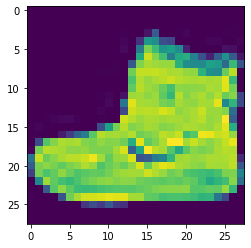

In [3]:
plt.imshow(train_images[0])

In [4]:
print(train_labels[0])
print(train_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

In [5]:
#Just to normalize between 0 and 1 we are dividing with 255.0
train_images = train_images/255.0
test_images = test_images/255.0 

In [17]:
class callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nReached 70% accuracy, stopping training...")
      self.model.stop_training = True
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
                                 tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
                                 tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks()])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4653
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3569
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3183
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.2987
Reached 70% accuracy, stopping training...
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2986


In [12]:
model.evaluate(test_images, test_labels, callbacks=[callbacks()])

313/313 [==============================] - 1s 2ms/step - loss: 0.3517


0.35170677304267883

In [13]:
classification_testimages = model.predict(test_images, callbacks=callbacks())

In [14]:
print(classification_testimages[0])
print(test_labels[0])

[3.66432687e-05 1.54731806e-05 2.50279254e-06 1.54227280e-06
 7.50755771e-06 4.17338423e-02 1.41452219e-05 5.64398877e-02
 1.06634325e-05 9.01737809e-01]
9


9


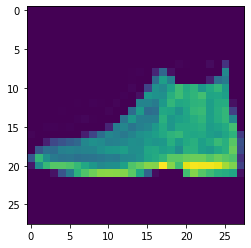

In [15]:
plt.imshow(test_images[0])
print(test_labels[0])